In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
epochs = 10
hidden_size = 128

In [3]:
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra'
test_url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes'

train_df = pd.read_csv(train_url, header=None)
test_df  = pd.read_csv(test_url,  header=None)

# Разделяем на признаки и метки
X_train = train_df.iloc[:, :-1].values.astype('float32') / 16.0
y_train = train_df.iloc[:, -1].values.astype('int64')
X_test  = test_df.iloc[:, :-1].values.astype('float32') / 16.0
y_test  = test_df.iloc[:, -1].values.astype('int64')

# Проверяем размеры: train 3823, test 1797
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Создаем датасеты и загрузчики
train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_dataset = TensorDataset(torch.from_numpy(X_test),  torch.from_numpy(y_test))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

Train samples: 3823, Test samples: 1797


In [4]:
model = nn.Sequential(
    nn.Linear(64, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies = []
test_accuracies = []

Epoch 1: Train Acc = 0.6618, Test Acc = 0.8275
Epoch 2: Train Acc = 0.8967, Test Acc = 0.9015
Epoch 3: Train Acc = 0.9309, Test Acc = 0.9210
Epoch 4: Train Acc = 0.9456, Test Acc = 0.9293
Epoch 5: Train Acc = 0.9498, Test Acc = 0.9260
Epoch 6: Train Acc = 0.9587, Test Acc = 0.9377
Epoch 7: Train Acc = 0.9618, Test Acc = 0.9321
Epoch 8: Train Acc = 0.9660, Test Acc = 0.9416
Epoch 9: Train Acc = 0.9683, Test Acc = 0.9377
Epoch 10: Train Acc = 0.9697, Test Acc = 0.9444


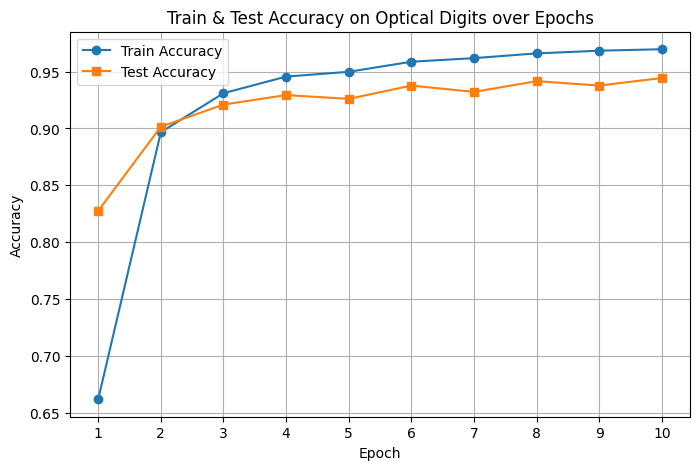

In [5]:
for epoch in range(1, epochs+1):
    model.train()
    correct_train = total_train = 0
    for features, labels in train_loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (preds == labels).sum().item()
    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    model.eval()
    correct_test = total_test = 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (preds == labels).sum().item()
    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies,  marker='s', label='Test Accuracy')
plt.title('Train & Test Accuracy on Optical Digits over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid(True)
plt.show()